# This is going to be the final EDA


## Exploratory data analysis, statistical analysis and descriptive analysis

#### Initial code

In [74]:
#Import Libraries and load dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

#Dataset
df = pd.read_csv("dataset/datasetcleaned.csv", encoding="latin1")

#### General questions about the dataset

Inspect the first rows, show the dimensions and identify the types of variables.

In [75]:
# How do the first rows of the dataset look like? 
df.head()

,Country,Region,DataYear,ClassGrade,Gender,Ageyears,Handed,Height_cm,Footlength_cm,Armspan_cm,...,Watching_TV_Hours,Paid_Work_Hours,Work_At_Home_Hours,Schoolwork_Pressure,Planned_Education_Level,Favorite_Music,Superpower,Preferred_Status,Role_Model_Type,Charity_Donation
0,USA,CA,2018,12,Female,17.0,Left-Handed,167,25.3,160,...,10,30,20.0,A lot,Graduate degree,Pop,Telepathy,Healthy,Relative,"Wildlife, animals"
1,USA,CA,2016,12,Female,17.0,Right-Handed,57,24,149,...,8,0,5.0,A lot,Graduate degree,Rap/Hip hop,Telepathy,Healthy,Relative,Environment
2,USA,CA,2016,4,Male,17.0,Left-Handed,168,24,170,...,1,0,2.0,Some,Graduate degree,Rock and roll,Telepathy,Happy,Relative,Health
3,USA,CA,2023,12,Male,16.0,Right-Handed,180,29.6,184,...,4,7,1.0,A lot,Graduate degree,Reggae,Fly,Happy,Relative,"Wildlife, animals"
4,USA,CA,2017,7,Female,12.0,Ambidextrous,154,10.5,64,...,3,0,2.0,Some,Some college,Pop,Fly,Happy,Relative,"Wildlife, animals"


In [76]:
# What are the dimensions of the dataset?
print("What are the dimensions of the dataset?")
print(df.shape)

What are the dimensions of the dataset?
(738, 60)


In [77]:
# How many variables of each data type do we have in the dataset?
print(
    df
    .dtypes
    .value_counts()
)

object     52
int64       5
float64     3
Name: count, dtype: int64


In [78]:
# Which columns are of each data type?
data_types = df.columns.to_series().groupby(df.dtypes).groups

print("Data Type            | Columns")
print("-----------------------------------")
for types, columns in data_types.items():
    columns_str = ', '.join(columns)
    types_str = str(types)
    print(f"{types_str:<20} | {columns_str}")

Data Type            | Columns
-----------------------------------
int64                | DataYear, ClassGrade, Importance_reducing_pollution, Sleep_Hours_Non_Schoolnight, Paid_Work_Hours
float64              | Ageyears, Reaction_time, Work_At_Home_Hours
object               | Country, Region, Gender, Handed, Height_cm, Footlength_cm, Armspan_cm, Languages_spoken, Travel_to_School, Travel_time_to_School, Score_in_memory_game, Favourite_physical_activity, Importance_recycling_rubbish, Importance_conserving_water, Importance_saving_energy, Importance_owning_computer, Importance_Internet_access, Left_Footlength_cm, Longer_foot, Index_Fingerlength_mm, Ring_Fingerlength_mm, Longer_Finger_Lefthand, Birth_month, Favorite_Season, Allergies, Vegetarian, Favorite_Food, Beverage, Favorite_School_Subject, Sleep_Hours_Schoolnight, Home_Occupants, Home_Internet_Access, Communication_With_Friends, Text_Messages_Sent_Yesterday, Text_Messages_Received_Yesterday, Hanging_Out_With_Friends_Hours, Talking_

---

#### -------------------------------- Statistical Analysis --------------------------------

#### 1. How many students are right-handed, left-handed or ambidextrous?

In [79]:
# 1.How many students are right-handed, left-handed or ambidextrous? -> Answers by console
print('How many students are right-handed, left-handed or ambidextrous?\n')

handed_counts = df['Handed'].value_counts() #Count the unique values in the 'Handed' column.
handed_counts_df = handed_counts.to_frame().reset_index()
handed_counts_df.columns = ['Lateralidad', 'Cantidad']
print("Number of students by type of laterality:")
print(tabulate(handed_counts_df, headers='keys', tablefmt='grid', showindex=False))
print('-'*50)
#----------------------------------------------------------------
# 1a.How many students are right-handed, left-handed or ambidextrous for each region? 
print("\nHow many students are right-handed, left-handed or ambidextrous for each region? ")
handed_by_region = df.groupby('Region')['Handed'].value_counts() # Group by region and count the unique laterality values within each group.
handed_by_region_table = handed_by_region.unstack().fillna(0) # Unstack the levels of the index to obtain a table
table_data = handed_by_region_table.reset_index().values.tolist() # Convert the table to a list of lists format
headers = ['Region', 'Ambidextrous', 'Left-handed', 'Right-handed'] # List of column headers
print("Number of students by type of laterality and region:") # Print the results
print(tabulate(table_data, headers=headers, tablefmt='grid'))

How many students are right-handed, left-handed or ambidextrous?

Number of students by type of laterality:
+---------------+------------+
| Lateralidad   |   Cantidad |
+===============+============+
| Right-Handed  |        666 |
+---------------+------------+
| Left-Handed   |         59 |
+---------------+------------+
| Ambidextrous  |         13 |
+---------------+------------+
--------------------------------------------------

How many students are right-handed, left-handed or ambidextrous for each region? 
Number of students by type of laterality and region:
+----------+----------------+---------------+----------------+
| Region   |   Ambidextrous |   Left-handed |   Right-handed |
+==========+================+===============+================+
| CA       |              5 |            28 |            262 |
+----------+----------------+---------------+----------------+
| PA       |              1 |            15 |            157 |
+----------+----------------+---------------+---

How many students are right-handed, left-handed or ambidextrous?



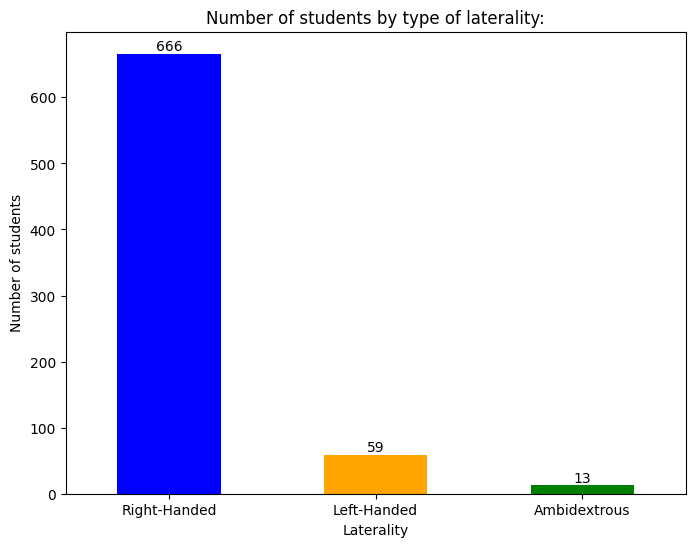

--------------------------------------------------
How many students are right-handed, left-handed or ambidextrous for each region? 


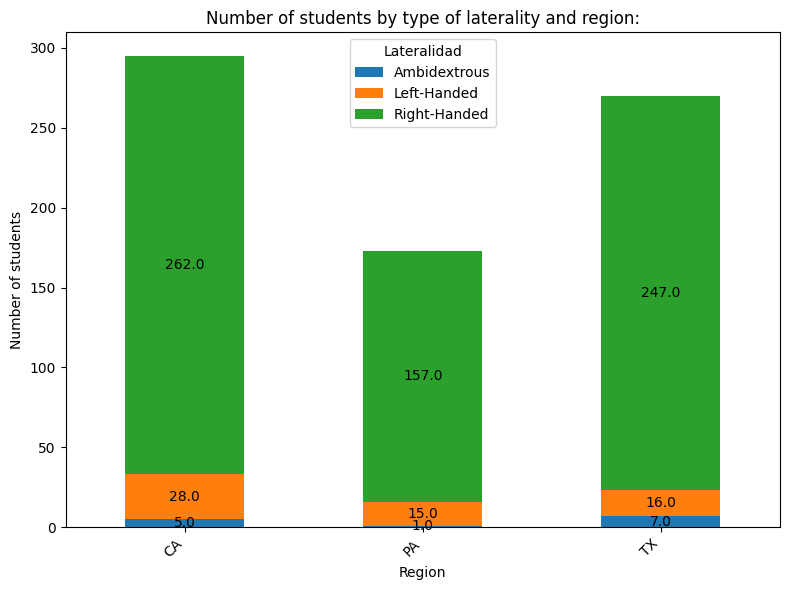

In [80]:
# 1.How many students are right-handed, left-handed or ambidextrous? -> Answers by charts
print('How many students are right-handed, left-handed or ambidextrous?\n')

plt.figure(figsize=(8, 6)) # Plotting the results
ax = handed_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
for p in ax.patches: # Add the values in each bar
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.title('Number of students by type of laterality:')
plt.xlabel('Laterality')
plt.ylabel('Number of students')
plt.xticks(rotation=0)
plt.show()
print('-'*50)
#----------------------------------------------------------------
# 1a.How many students are right-handed, left-handed or ambidextrous for each region? 
print("How many students are right-handed, left-handed or ambidextrous for each region? ")
handed_by_region = df.groupby(['Region', 'Handed']).size().unstack(fill_value=0) # Group by region and count the unique laterality values within each group.
ax = handed_by_region.plot(kind='bar', stacked=True, figsize=(8, 6)) # Plot the distribution of laterality by region.


plt.title('Number of students by type of laterality and region:')
plt.xlabel('Region')
plt.ylabel('Number of students')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Lateralidad')
plt.tight_layout()
for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center')
plt.show()

#### 2. How many students have longer right foot, left foot or equal?

In [81]:
#2. How many students have longer left foot, left foot or equal? -> Answers by console
foot_length_counts = df['Longer_foot'].value_counts().reset_index()# Count how many students have the longest each foot.
foot_length_counts.rename(columns={'Longer_foot': 'Foot', 'count': 'Count'}, inplace=True)
print("Number of students by type of laterality:")
print(tabulate(foot_length_counts, headers='keys', tablefmt='grid', showindex=False))# Print the results in a table format
print('-'*50)
# How many students have the longest left foot, left foot or equal in each region?
region_foot_length_counts = df.groupby(['Region', 'Longer_foot']).size().unstack(fill_value=0).reset_index()
print("Number of students by type of laterality and region:")
print(tabulate(region_foot_length_counts, headers='keys', tablefmt='grid', showindex=False))

Number of students by type of laterality:
+-------------+---------+
| Foot        |   Count |
+=============+=========+
| Same length |     430 |
+-------------+---------+
| Right foot  |     171 |
+-------------+---------+
| Left foot   |     137 |
+-------------+---------+
--------------------------------------------------
Number of students by type of laterality and region:
+----------+-------------+--------------+---------------+
| Region   |   Left foot |   Right foot |   Same length |
+==========+=============+==============+===============+
| CA       |          63 |           68 |           164 |
+----------+-------------+--------------+---------------+
| PA       |          38 |           46 |            89 |
+----------+-------------+--------------+---------------+
| TX       |          36 |           57 |           177 |
+----------+-------------+--------------+---------------+


How many students have longer left foot, right foot or equal?



<Figure size 800x600 with 0 Axes>

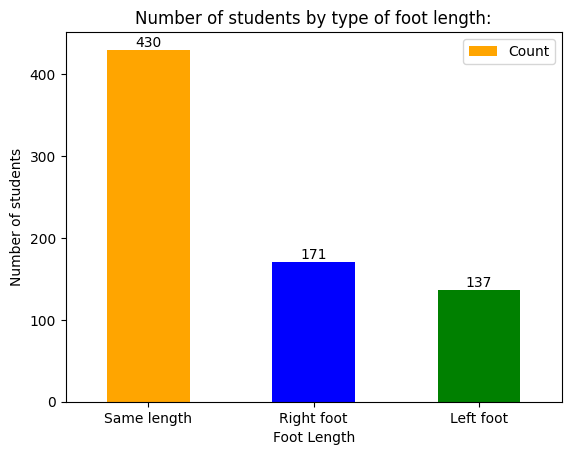

--------------------------------------------------
How many students have longer left foot, right foot or equal for each region?


<Figure size 1000x600 with 0 Axes>

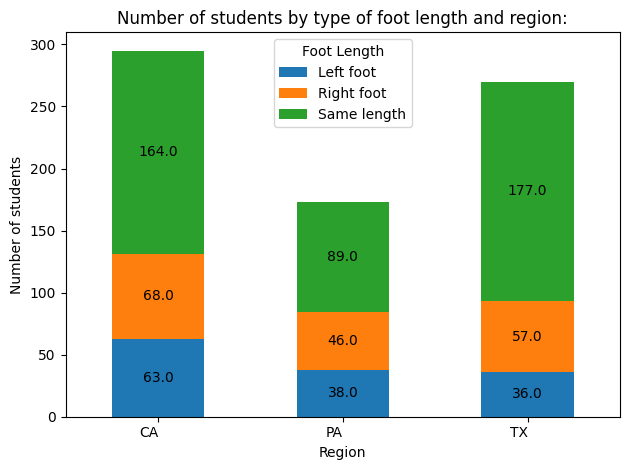

In [82]:
# 2.How many students have longer left foot, left foot or equal? -> Answers by charts
print('How many students have longer left foot, right foot or equal?\n')

plt.figure(figsize=(8, 6))
ax = foot_length_counts.plot(kind='bar', x='Foot', y='Count', color=['orange', 'blue', 'green']) # Plot the results
for p in ax.patches: # Add the values in each bar
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.title('Number of students by type of foot length:')
plt.xlabel('Foot Length')
plt.ylabel('Number of students')
plt.xticks(rotation=0)
plt.show()
print('-'*50)
#----------------------------------------------------------------
# 2a.How many students have longer left foot, right foot or equal for each region? 
print("How many students have longer left foot, right foot or equal for each region?")
foot_length_by_region = df.groupby(['Region', 'Longer_foot']).size().unstack(fill_value=0) # Group by region and count the unique foot length values within each group.
plt.figure(figsize=(10, 6))
ax = foot_length_by_region.plot(kind='bar', stacked=True) # Plot the distribution of foot length by region.

plt.title('Number of students by type of foot length and region:')
plt.xlabel('Region')
plt.ylabel('Number of students')
plt.xticks(rotation=0, ha='right')
plt.legend(title='Foot Length')
plt.tight_layout()

for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center')
plt.show()

#### 3. What is the month in which the most students of those participating in the School Census were born in each state?

In [83]:
# 3.What is the month in which the most students of those participating in the School Census were born in each state? -> Answers by console
print('What is the month in which the most students of those participating in the School Census were born in each state?\n')

def most_common_month(group): 
    return group['Birth_month'].value_counts().idxmax()

# Apply the custom function to obtain the most common month by state.
most_common_birth_month_by_region = df.groupby('Region')['Birth_month'].apply(lambda x: x.value_counts().idxmax()).reset_index(name='Most_common_month')

# Filter the original DataFrame to include only the most common months for each region
filtered_df = df.merge(most_common_birth_month_by_region, on='Region')
filtered_df = filtered_df[filtered_df['Birth_month'] == filtered_df['Most_common_month']]

# Calculate the total students for each region and most common month
total_students_by_month_and_region = filtered_df.groupby(['Region', 'Birth_month']).size().reset_index(name='Total')

print("Most common month of birth by state:") 
print(tabulate(total_students_by_month_and_region, headers='keys', tablefmt='grid', showindex=False))


What is the month in which the most students of those participating in the School Census were born in each state?

Most common month of birth by state:
+----------+---------------+---------+
| Region   | Birth_month   |   Total |
+==========+===============+=========+
| CA       | June          |      30 |
+----------+---------------+---------+
| PA       | October       |      27 |
+----------+---------------+---------+
| TX       | October       |      32 |
+----------+---------------+---------+


How many students were born in the most common month for each region?


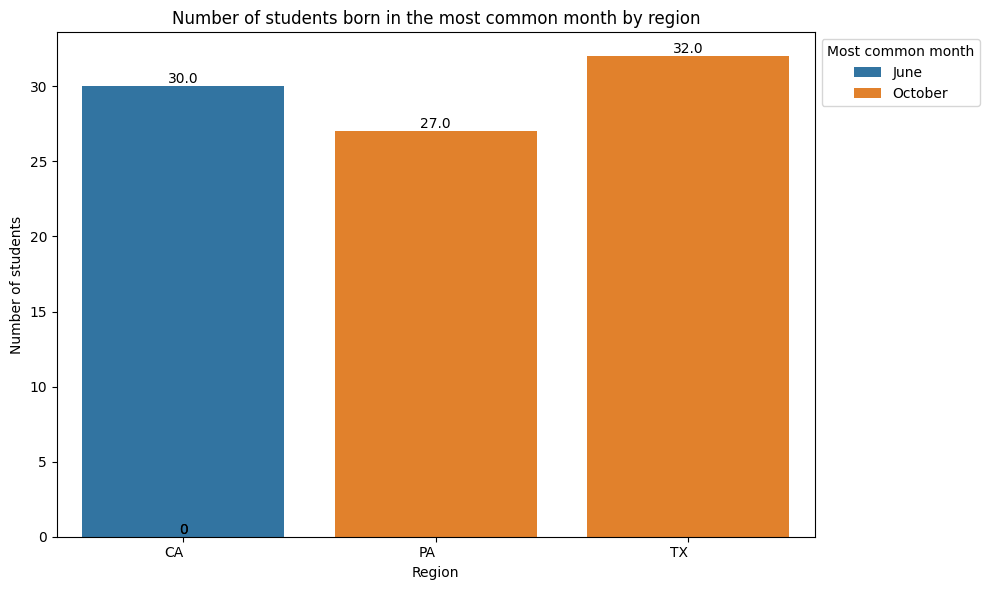

In [84]:
# 3.What is the month in which the most students of those participating in the School Census were born in each state? -> Answers by charts
print("How many students were born in the most common month for each region?")

# Find the most common birth month for each region
most_common_birth_month_by_region = df.groupby('Region')['Birth_month'].apply(lambda x: x.value_counts().idxmax()).reset_index(name='Most_common_month')

# Filter the original DataFrame to include only students born in the most common month for each region
filtered_df = df.merge(most_common_birth_month_by_region, on='Region')
filtered_df = filtered_df[filtered_df['Birth_month'] == filtered_df['Most_common_month']]

# Count the number of students born in the most common month for each region
students_by_common_month_and_region = filtered_df.groupby(['Region', 'Most_common_month']).size().reset_index(name='Total')

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=students_by_common_month_and_region, x='Region', y='Total', hue='Most_common_month')

plt.title('Number of students born in the most common month by region')
plt.xlabel('Region')
plt.ylabel('Number of students')
plt.xticks(rotation=0, ha='right')
plt.legend(title='Most common month', bbox_to_anchor=(1, 1))

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


#### 4. What is the favorite station of students participating in the School Census in each state?

In [85]:
# 4.What is the favorite station of students participating in the School Census in each state? -> Answers by console
print("What is the favorite station of students participating in the School Census in each state?\n")

# Find the most common favorite station for each region
most_common_station_by_region = df.groupby('Region')['Favorite_Season'].apply(lambda x: x.value_counts().idxmax()).reset_index(name='Most_common_favorite_station')

# Merge the most_common_station_by_region DataFrame with the original DataFrame on the 'Region' column
merged_df = pd.merge(df, most_common_station_by_region, on='Region')

# Filter the rows where the 'Favorite_Season' column is equal to the most common favorite station for each region
filtered_df = merged_df[merged_df['Favorite_Season'] == merged_df['Most_common_favorite_station']]

# Count the total number of students with the most common favorite station for each region
total_students_with_favorite_station_by_region = filtered_df.groupby('Region').size().reset_index(name='Total')

# Merge with the most_common_station_by_region DataFrame to include the most common favorite station by region
most_common_station_by_region = pd.merge(most_common_station_by_region, total_students_with_favorite_station_by_region, on='Region')

print("Most common favorite station by state:") 
print(tabulate(most_common_station_by_region, headers='keys', tablefmt='grid', showindex=False))

What is the favorite station of students participating in the School Census in each state?

Most common favorite station by state:
+----------+--------------------------------+---------+
| Region   | Most_common_favorite_station   |   Total |
+==========+================================+=========+
| CA       | Summer                         |     102 |
+----------+--------------------------------+---------+
| PA       | Fall                           |      62 |
+----------+--------------------------------+---------+
| TX       | Fall                           |      85 |
+----------+--------------------------------+---------+


What is the favorite station of students participating in the School Census in each state?



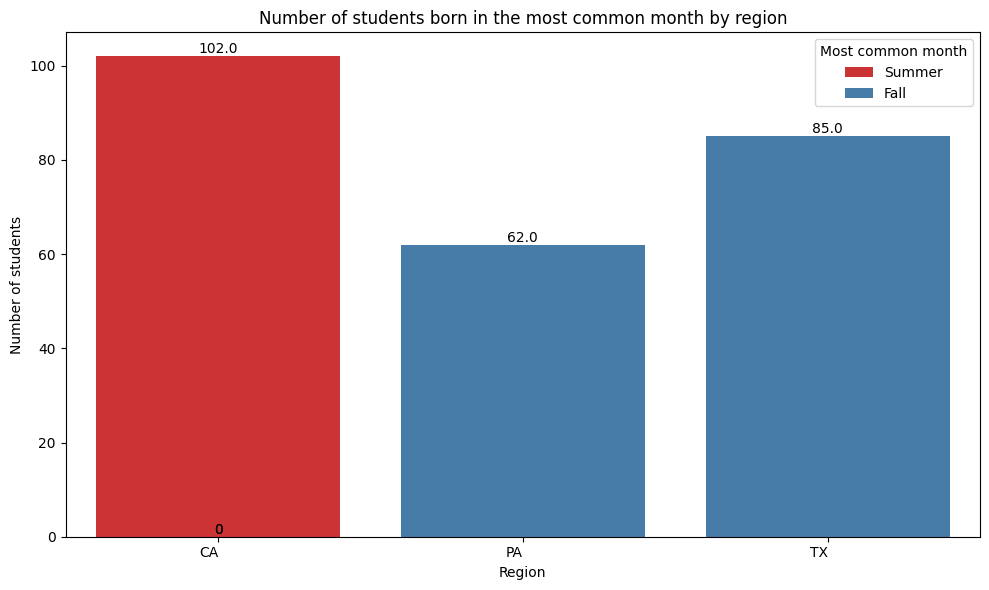

In [86]:
# 4.What is the favorite station of students participating in the School Census in each state? -> Answers by charts
print("What is the favorite station of students participating in the School Census in each state?\n")

# Find the most common favorite station for each region
most_common_station_by_region = df.groupby('Region')['Favorite_Season'].apply(lambda x: x.value_counts().idxmax()).reset_index(name='Most_Favorite_Season')

# Merge the most_common_station_by_region DataFrame with the original DataFrame on the 'Region' column
filtered_df = df.merge(most_common_station_by_region, on='Region')
filtered_df = filtered_df[filtered_df['Favorite_Season'] == filtered_df['Most_Favorite_Season']]

# Count the total number of students with the most common favorite station for each region
students_by_common_month_and_region = filtered_df.groupby(['Region', 'Most_Favorite_Season']).size().reset_index(name='Total')

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=students_by_common_month_and_region, x='Region', y='Total', hue='Most_Favorite_Season', palette='Set1')

plt.title('Number of students born in the most common month by region')
plt.xlabel('Region')
plt.ylabel('Number of students')
plt.xticks(rotation=0, ha='right')
plt.legend(title='Most common month', bbox_to_anchor=(1, 1))

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

#### 5. What is the favorite drink of students participating in the School Census in each state?

In [87]:
# 5.What is the favorite drink of students participating in the School Census in each state?-> Answers by console
print('What is the favorite drink of students participating in the School Census in each state?\n')
most_common_drink_by_region = df.groupby('Region')['Beverage'].apply(lambda x: x.value_counts().idxmax()).reset_index(name='Most_common_beverage')
merged_df = pd.merge(df, most_common_drink_by_region, on='Region')
filtered_df = merged_df[merged_df['Beverage'] == merged_df['Most_common_beverage']]
total_students_with_common_drink_by_region = filtered_df.groupby('Region').size().reset_index(name='Total')
most_common_drink_by_region = pd.merge(most_common_drink_by_region, total_students_with_common_drink_by_region, on='Region')

print("Most common favorite beverage by state:") # Print the results
print(tabulate(most_common_drink_by_region, headers='keys', tablefmt='grid', showindex=False))

What is the favorite drink of students participating in the School Census in each state?

Most common favorite beverage by state:
+----------+------------------------+---------+
| Region   | Most_common_beverage   |   Total |
+==========+========================+=========+
| CA       | Water                  |     221 |
+----------+------------------------+---------+
| PA       | Water                  |     126 |
+----------+------------------------+---------+
| TX       | Water                  |     186 |
+----------+------------------------+---------+


What is the favorite drink of students participating in the School Census in each state?



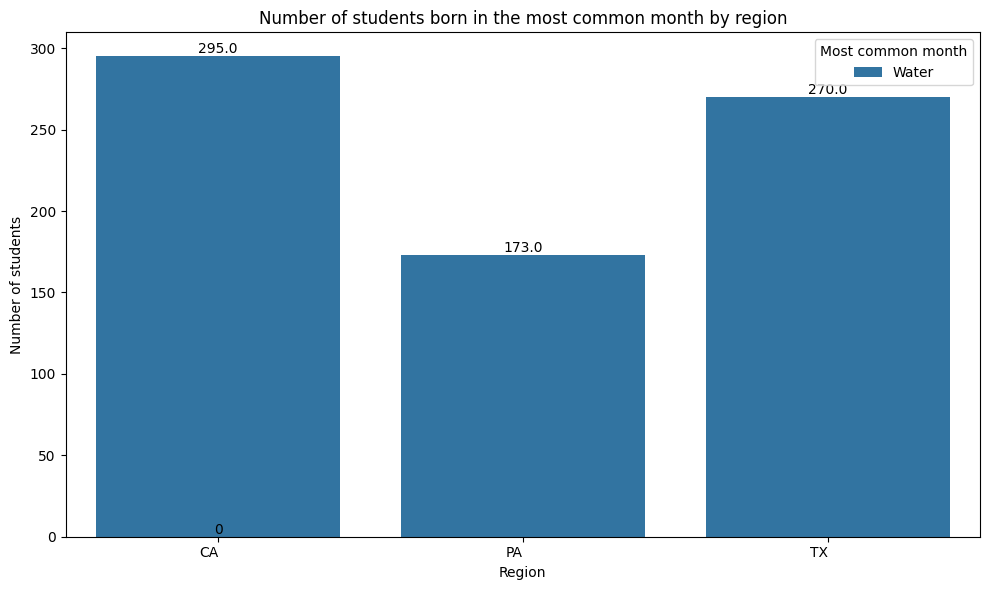

In [88]:
# 5.What is the favorite drink of students participating in the School Census in each state? -> Answers by charts
print('What is the favorite drink of students participating in the School Census in each state?\n')

# Find the most common favorite station for each region
most_common_drink_by_region = df.groupby('Region')['Beverage'].apply(lambda x: x.value_counts().idxmax()).reset_index(name='Most_common_beverage')

# Merge the most_common_station_by_region DataFrame with the original DataFrame on the 'Region' column
filtered_df = df.merge(most_common_drink_by_region, on='Region')
filtered_df = filtered_df[filtered_df['Most_common_beverage'] == filtered_df['Most_common_beverage']]

# Count the total number of students with the most common favorite station for each region
students_by_most_common_drink_by_region = filtered_df.groupby(['Region', 'Most_common_beverage']).size().reset_index(name='Total')

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=students_by_most_common_drink_by_region, x='Region', y='Total', hue='Most_common_beverage')

plt.title('Number of students born in the most common month by region')
plt.xlabel('Region')
plt.ylabel('Number of students')
plt.xticks(rotation=0, ha='right')
plt.legend(title='Most common month', bbox_to_anchor=(1, 1))

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

#### 6. Build a histogram with the variable "time the student works with pay in the week (measured in hours)" and from this graph answer the following questions:

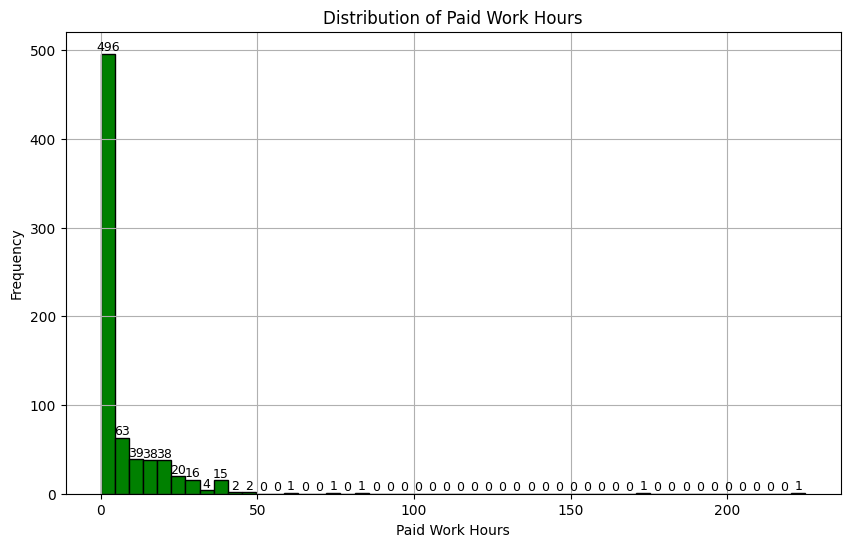

In [89]:
# Build the histogram of Paid_Work_Hours
plt.figure(figsize=(10, 6))
counts, edges, _ = plt.hist(df['Paid_Work_Hours'], bins=50, color='green', edgecolor='black')
for count, edge in zip(counts, edges):
    plt.text(edge + (edges[1] - edges[0]) / 2, count, str(int(count)), ha='center', va='bottom', fontsize=9)
plt.title('Distribution of Paid Work Hours')
plt.xlabel('Paid Work Hours')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [90]:
# Questions 1 - 8

# 1. Percentage of students working maximum 13 hours per week with pay
percentage_less_than_13 = len(df[df['Paid_Work_Hours'] <= 13]) / len(df) * 100

# 2. Percentage of students working minimum 3 hours per week with pay
percentage_greater_than_3 = len(df[df['Paid_Work_Hours'] >= 3]) / len(df) * 100

# 3. Minimum value of paid work hours corresponding to the 20th percentile
percentile_20 = np.percentile(df['Paid_Work_Hours'], 20)

# 4. Maximum value of paid work hours corresponding to the 80th percentile
percentile_80 = np.percentile(df['Paid_Work_Hours'], 80)

# 5. Interval where the mode lies (range of the bin with the highest frequency)
# Using the previously constructed histogram to find the bin with the highest frequency
hist, bins = np.histogram(df['Paid_Work_Hours'], bins=20)
mode_bin_index = np.argmax(hist)
mode_interval = (bins[mode_bin_index], bins[mode_bin_index + 1])

# 6. Maximum value of paid work hours corresponding to the 50th percentile (median)
median = np.percentile(df['Paid_Work_Hours'], 50)

# 7. Mean and standard deviation of paid work hours
mean_paid_work_hours = df['Paid_Work_Hours'].mean()
std_dev_paid_work_hours = df['Paid_Work_Hours'].std()

# 8. Type of skewness (positive, negative, or symmetric)
skewness = df['Paid_Work_Hours'].skew()
if skewness > 0:
    skew_type = 'Positive (left-skewed)'
elif skewness < 0:
    skew_type = 'Negative (right-skewed)'
else:
    skew_type = 'Symmetric'

# Display the results
print("1. Percentage of students working maximum 13 hours per week with pay: {:.2f}%".format(percentage_less_than_13))
print("2. Percentage of students working minimum 3 hours per week with pay: {:.2f}%".format(percentage_greater_than_3))
print("3. Minimum value of paid work hours corresponding to the 20th percentile: {:.2f}".format(percentile_20))
print("4. Maximum value of paid work hours corresponding to the 80th percentile: {:.2f}".format(percentile_80))
print("5. Interval where the mode lies: ({:.2f}, {:.2f})".format(mode_interval[0], mode_interval[1]))
print("6. Maximum value of paid work hours corresponding to the 50th percentile (median): {:.2f}".format(median))
print("7. Mean of paid work hours per week: {:.2f}, Standard deviation: {:.2f}".format(mean_paid_work_hours, std_dev_paid_work_hours))
print("8. Skewness type of the distribution of paid work hours: {}".format(skew_type))

1. Percentage of students working maximum 13 hours per week with pay: 81.03%
2. Percentage of students working minimum 3 hours per week with pay: 36.31%
3. Minimum value of paid work hours corresponding to the 20th percentile: 0.00
4. Maximum value of paid work hours corresponding to the 80th percentile: 12.00
5. Interval where the mode lies: (0.00, 11.25)
6. Maximum value of paid work hours corresponding to the 50th percentile (median): 0.00
7. Mean of paid work hours per week: 6.50, Standard deviation: 14.69
8. Skewness type of the distribution of paid work hours: Positive (left-skewed)


#### 8. Build a Box Plot graph to compare the opinion in the different States of men and women (Gender) with respect to the importance of reducing pollution (pollution) from this graph answer the following questions


Boxplot charts


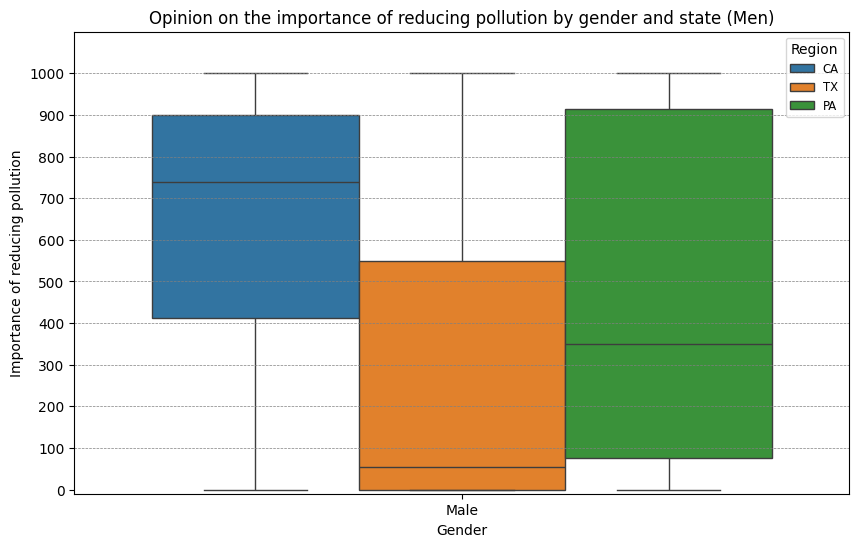

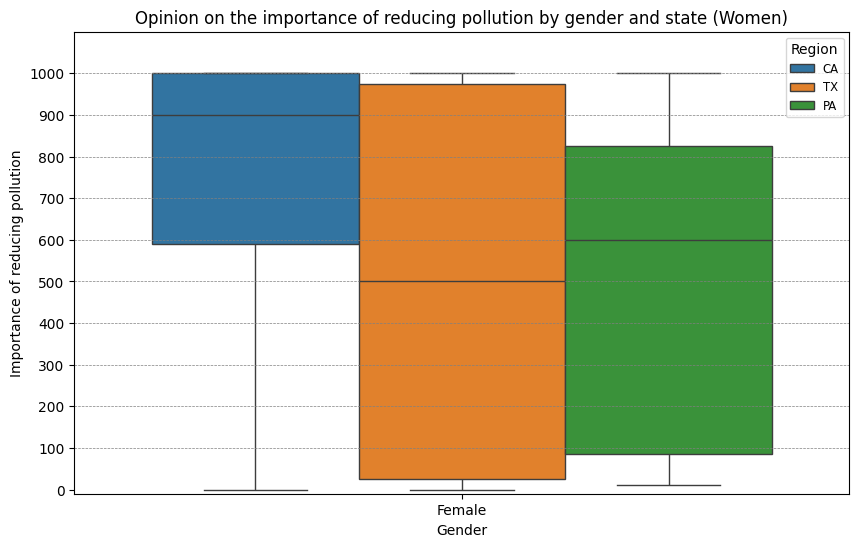

Summary statistics for men:
+----------------+-------+--------+--------+-----+-------+-------+-------+--------+
|                | count |  mean  |  std   | min |  25%  |  50%  |  75%  |  max   |
+----------------+-------+--------+--------+-----+-------+-------+-------+--------+
| ('CA', 'Male') | 141.0 | 642.28 | 315.94 | 0.0 | 412.0 | 738.0 | 900.0 | 1000.0 |
| ('TX', 'Male') | 20.0  | 302.0  | 391.78 | 0.0 |  0.0  | 55.0  | 550.0 | 1000.0 |
| ('PA', 'Male') | 11.0  | 457.27 | 425.04 | 0.0 | 75.0  | 350.0 | 915.0 | 1000.0 |
+----------------+-------+--------+--------+-----+-------+-------+-------+--------+

Summary statistics for women:
+------------------+-------+--------+--------+------+-------+-------+--------+--------+
|                  | count |  mean  |  std   | min  |  25%  |  50%  |  75%   |  max   |
+------------------+-------+--------+--------+------+-------+-------+--------+--------+
| ('CA', 'Female') | 154.0 | 764.66 | 295.08 | 0.0  | 591.0 | 900.0 | 1000.0 | 1000.0 |
|

In [96]:
#Build the Box Plots
#Filter the DataFrame
df_filtered = df[(df['Importance_reducing_pollution'] >= 0) & (df['Importance_reducing_pollution'] <= 1000)]

# Filter by gender
df_male = df_filtered[df_filtered["Gender"] == 'Male']
df_female = df_filtered[df_filtered["Gender"] == 'Female']
def plot_gender_boxplot(df_male, df_female):
    def plot_boxplot(df, title):
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Gender', y='Importance_reducing_pollution', data=df, hue='Region')
        plt.title(title)
        plt.xlabel('Gender')
        plt.ylabel('Importance of reducing pollution')
        plt.xticks(rotation=0)
        plt.legend(title='Region', loc='upper right', fontsize='small')
        plt.ylim(-10, 1100)
        plt.yticks(range(0, 1001, 100))
        
        for i in range(100, 1100, 100):
            plt.axhline(y=i, color='gray', linestyle='--', linewidth=0.5)
        
        plt.show()
    
    plot_boxplot(df_male, 'Opinion on the importance of reducing pollution by gender and state (Men)')
    plot_boxplot(df_female, 'Opinion on the importance of reducing pollution by gender and state (Women)')


print("\nBoxplot charts")
plot_gender_boxplot(df_male, df_female)
# Define the order of the regions
region_order = ['CA', 'TX', 'PA']
# Grouping by region and gender and calculating descriptive statistics
summary_stats_male = df_male.groupby(['Region', 'Gender'])['Importance_reducing_pollution'].describe().round(2)
summary_stats_female = df_female.groupby(['Region', 'Gender'])['Importance_reducing_pollution'].describe().round(2)
# Sort the summary statistics by region in the desired order
summary_stats_male_sorted = summary_stats_male.reindex(region_order, level=0)
summary_stats_female_sorted = summary_stats_female.reindex(region_order, level=0)

print("Summary statistics for men:")
print(tabulate(summary_stats_male_sorted, headers='keys', tablefmt='pretty'))
print("\nSummary statistics for women:")
print(tabulate(summary_stats_female_sorted, headers='keys', tablefmt='pretty'))


##### A. In general terms, for whom (men or women) is it more important to reduce pollution?

In [114]:
# Calculate the average of the responses by state.
mean_by_region_gender = df_filtered.groupby('Gender')['Importance_reducing_pollution'].mean().round(2)
# Obtain the gender with the highest average
max_mean_gender = mean_by_region_gender.idxmax()
max_mean_value = mean_by_region_gender.max()
# Print the result
print(f"A. In general terms, the gender most interested in reducing pollution is {max_mean_gender}, with an average of {max_mean_value} points on a scale of 1 to 1000.")

A. In general terms, the gender most interested in reducing pollution is Female, with an average of 717.7 points on a scale of 1 to 1000.


#### B. In general terms, in which State is it most important to reduce pollution?

In [ ]:
# Calculate the average of the responses by state.
mean_by_region = df_filtered.groupby('Region')['Importance_reducing_pollution'].mean().round(2)
# Obtain the state with the highest average
max_mean_region = mean_by_region.idxmax()
max_mean_value = mean_by_region.max()
# Print the result
print(f"B. Overall, the most important state for reducing pollution is {max_mean_region}, with an average of {max_mean_value} points on a scale of 1 to 1000.")

##### C. In general terms, in which State is it most important for women to reduce pollution?

In [115]:
# To answer this question we will use the average of the results taken from the respondents.
female_and_region = df_female.groupby('Region')['Importance_reducing_pollution'].mean().round(2)
# Obtain the state with the highest average
max_mean_region_female = female_and_region.idxmax()
max_mean_value_female = female_and_region.max()
# Print the result
print(f"C. Overall, the most important state for reducing pollution based on women's opinion is {max_mean_region_female}, with a mean of {max_mean_value_female} points on a scale of 1 to 1000.")

C. Overall, the most important state for reducing pollution based on women's opinion is CA, with a mean of 764.66 points on a scale of 1 to 1000.


##### D. In general terms, in which State is it most important for men to reduce pollution?

In [116]:
# To answer this question we will use the average of the results taken from the respondents.
male_and_region = df_male.groupby('Region')['Importance_reducing_pollution'].mean().round(2)
# Obtain the state with the highest average
max_mean_region_male = male_and_region.idxmax()
max_mean_value_male = male_and_region.max()
# Print the result
print(f"D. Overall, the most important state for reducing pollution based on men's opinion is {max_mean_region_male}, with an average of {max_mean_value_male} points on a scale of 1 to 1000.")

D. Overall, the most important state for reducing pollution based on men's opinion is CA, with an average of 642.28 points on a scale of 1 to 1000.


##### E. In general terms, in which gender is the importance of reducing pollution more homogeneous?


In [118]:
#For this answer we will take the standard deviation, since it tells us how far the data are from the mean.
# Calculate the standard deviation of the responses by Gender
std_by_region_gender = df_filtered.groupby('Gender')['Importance_reducing_pollution'].std().round(2)
min_std_gender = std_by_region_gender.idxmin()
min_std_value_gender = std_by_region_gender.min()
# Print the result
print(f"E. Overall, the genre with the most homogeneous responses to reduce contamination is {min_std_gender}, with a standard deviation of {min_std_value_gender}")
print(std_by_region_gender)

E. Overall, the genre with the most homogeneous responses to reduce contamination is Female, with a standard deviation of 334.47
Gender
Female    334.47
Male      349.90
Name: Importance_reducing_pollution, dtype: float64


##### F. In general terms, in which State is the importance of reducing pollution more heterogeneous?

In [ ]:
# Calculate the mean of the responses by state.
std_by_region = df_filtered.groupby('Region')['Importance_reducing_pollution'].std().round(2)

min_std_region = std_by_region.idxmin()
min_std_value_region = std_by_region.min()
# Print the result
print(f"\nF. Overall, the state with the most homogeneous responses to reduce pollution is {min_std_region}, with a standard deviation of {min_std_value_region} ")
print(mean_by_region)

##### G. In which gender is there more asymmetry in ratings of the importance of reducing pollution?


In [119]:
# G In which gender is there more skewness in the ratings of the importance of reducing pollution
skew_by_gender = df_filtered.groupby('Gender')['Importance_reducing_pollution'].skew().round(2)
max_skew_gender = skew_by_gender.idxmax()
max_skew_value_gender = skew_by_gender.max()
# Print the result
print(f"\nG. Overall, the gender with the highest skewness in ratings for reducing pollution is {max_skew_gender}, with a skewness of {max_skew_value_gender} ")
print("   This suggests that there is a distribution of responses more skewed to the left of the median")


G. Overall, the gender with the highest skewness in ratings for reducing pollution is Male, with a skewness of -0.41 
   This suggests that there is a distribution of responses more skewed to the left of the median


##### H. In which state is there the greatest asymmetry in ratings of the importance of reducing pollution?

In [120]:
# the greatest asymmetry in ratings of the importance of reducing pollution
skew_by_region = df_filtered.groupby('Region')['Importance_reducing_pollution'].skew().round(2)
max_skew_region = skew_by_region.idxmax()
max_skew_value_region = skew_by_region.max()

# Print the result
print(f"H. Overall, the State with the highest asymmetry in the ratings for reducing pollution is {max_skew_region}, with an asymmetry of {max_skew_value_region} ")
print("   This suggests that there is a distribution of responses more skewed to the right of the median.")

H. Overall, the State with the highest asymmetry in the ratings for reducing pollution is TX, with an asymmetry of 0.52 
   This suggests that there is a distribution of responses more skewed to the right of the median.


##### I. In which state do women have the greatest symmetry in ratings of the importance of reducing pollution?

In [121]:
# women have the greatest symmetry in ratings of the importance of reducing pollution?
df_female = df_female.groupby('Region')['Importance_reducing_pollution'].skew().round(2)
min_skew_gender = df_female.idxmin()
min_skew_value_gender = df_female.min()

# Print the result
print(f"I. Overall, the state with the highest symmetry in ratings for reducing pollution among females is {min_skew_gender}, with an asymmetry of {min_skew_value_gender} ")
print("   This suggests that there is a distribution of responses skewed more to the left of the median.")

I. Overall, the state with the highest symmetry in ratings for reducing pollution among females is CA, with an asymmetry of -1.18 
   This suggests that there is a distribution of responses skewed more to the left of the median.


---

#### 9. Build a cross-tabulation of indicators between the variable "How many hours of sleep per night do you usually sleep when you do not have classes the next day?" versus "Gender". From this table answer the following questions:

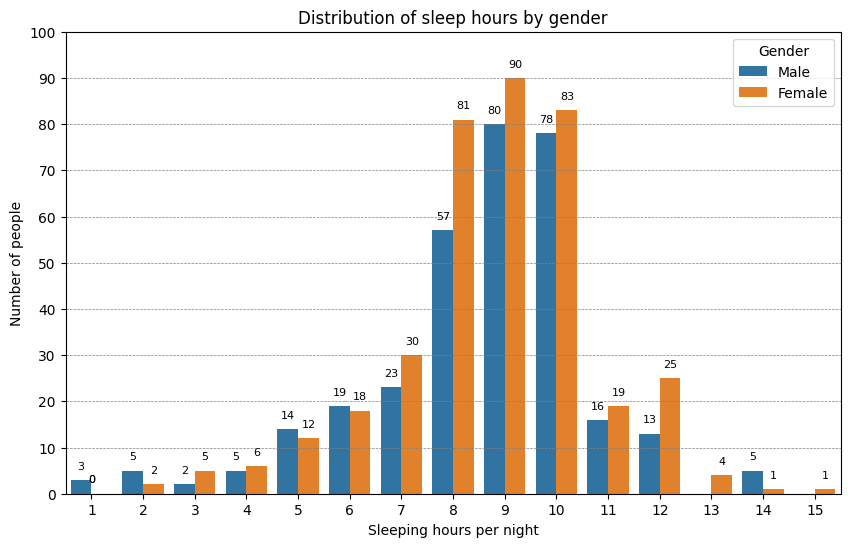


Data table
+--------+---+---+---+----+----+----+----+-----+-----+-----+----+----+----+----+----+-------+
| Gender | 1 | 2 | 3 | 4  | 5  | 6  | 7  |  8  |  9  | 10  | 11 | 12 | 13 | 14 | 15 | Total |
+--------+---+---+---+----+----+----+----+-----+-----+-----+----+----+----+----+----+-------+
| Female | 0 | 2 | 5 | 6  | 12 | 18 | 30 | 81  | 90  | 83  | 19 | 25 | 4  | 1  | 1  |  377  |
|  Male  | 3 | 5 | 2 | 5  | 14 | 19 | 23 | 57  | 80  | 78  | 16 | 13 | 0  | 5  | 0  |  320  |
| Total  | 3 | 7 | 7 | 11 | 26 | 37 | 53 | 138 | 170 | 161 | 35 | 38 | 4  | 6  | 1  |  697  |
+--------+---+---+---+----+----+----+----+-----+-----+-----+----+----+----+----+----+-------+


In [98]:
#Build the cross-tabulation
#Restriction of values
df_9 = df[["Gender", "Sleep_Hours_Non_Schoolnight"]][(df['Sleep_Hours_Non_Schoolnight'] >= 1) & (df['Sleep_Hours_Non_Schoolnight'] <= 15)]
# Build the crosstab table
crosstab_table = pd.crosstab(df_9['Gender'], df_9['Sleep_Hours_Non_Schoolnight'], margins=True, margins_name="Total")
# Create a bar chart
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Sleep_Hours_Non_Schoolnight', hue='Gender', data=df_9)
# Adjust labels and legends
plt.title('Distribution of sleep hours by gender')
plt.xlabel('Sleeping hours per night')
plt.ylabel('Number of people')
plt.legend(title='Gender')
plt.ylim(0, 100) # Adjust the y-axis limits according to your need
plt.yticks(range(0, 110, 10))  
# Add horizontal lines in intervals of 100 on the y-axis
for i in range(10, 110, 10):
    plt.axhline(y=i, color='gray', linestyle='--', linewidth=0.5)
# Add rounded values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(round(p.get_height()))}', (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
# Show the graphic
plt.show()
print("\nData table")
print(tabulate(crosstab_table, headers='keys', tablefmt='pretty'))

##### B. How many hours of sleep on average do the students in the sample usually sleep when they do not have classes the next day?


In [101]:
# hours of sleep
mean_students = df_9["Sleep_Hours_Non_Schoolnight"].mean()
#Print the result
#:.2f is used to specify to display 2 decimal places and in float
print(f"The average amount of sleep students get when they don't have school is {mean_students:.2f} hours.")

The average amount of sleep students get when they don't have school is 8.67 hours.


##### C. In general terms, which gender sleeps the longest?

In [103]:
# Calculate the mean of the answers by gender
mean_by_sleep_gender = df_9.groupby('Gender')['Sleep_Hours_Non_Schoolnight'].mean().round(2)

# Get the gender with the highest mean
max_mean_gender = mean_by_sleep_gender.idxmax()
max_mean_value = mean_by_sleep_gender.max()
# Print the result
print(f"Overall, the gender that sleeps the longest is {max_mean_gender}, with an average of {max_mean_value} Hours per day")

Overall, the gender that sleeps the longest is Female, with an average of 8.75 Hours per day


##### D. In general terms, in which genre are the times more homogeneous?

In [104]:
# Calculate the standard deviation of responses by gender.
std_by_sleep_gender = df_9.groupby('Gender')['Sleep_Hours_Non_Schoolnight'].std().round(2)
# Get the gender with the lowest std, as this measure tells us how homogeneous the data is.
min_std_gender = std_by_sleep_gender.idxmin()
min_std_value = std_by_sleep_gender.min()
# Print the result
print(f"Overall, the genus with the most homogeneous data is {min_std_gender}, with a standard deviation of {min_std_value}")

Overall, the genus with the most homogeneous data is Female, with a standard deviation of 1.98


##### E. In general terms, in which genre are the times more symmetrical?

In [106]:
# more symmetrical times
skew_by_sleep_gender = df_9.groupby('Gender')['Sleep_Hours_Non_Schoolnight'].skew().round(2)
#Obtain the gender with the least asymmetry (most symmetrical).
skew_std_gender = std_by_sleep_gender.idxmin()
skew_std_value = std_by_sleep_gender.min()
# Print the result
print(f"Overall, the genus with the most symmetrical times is {skew_std_gender}, with {skew_std_value}")

Overall, the genus with the most symmetrical times is Female, with 1.98


##### F. Which gender has a more pointed histogram? Which gender has a flatter or flatter histogram?

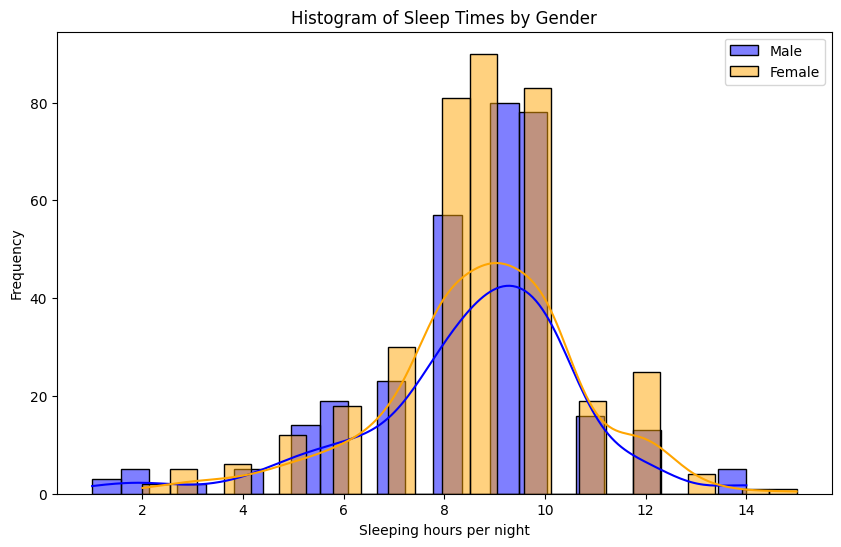

In [109]:
# Build histograms by gender and sleep hours
# Filter the data by gender
df9_female = df_9[df_9["Gender"] == "Female"]
df9_male = df_9[df_9["Gender"] == "Male"]
# Set the size of the graphic
plt.figure(figsize=(10, 6))
# Plot histogram for males
sns.histplot(data=df9_male, x='Sleep_Hours_Non_Schoolnight', color='blue', kde=True, label='Male')
# Plot histogram for females
sns.histplot(data=df9_female, x='Sleep_Hours_Non_Schoolnight', color='orange', kde=True, label='Female')
# Add title and labels
plt.title('Histogram of Sleep Times by Gender')
plt.xlabel('Sleeping hours per night')
plt.ylabel('Frequency')
# Show legend
plt.legend()
# Show chart
plt.show()

In [112]:
# Calculate the kurtosis  and the flattest of the times for each gender.
kurtosis_by_gender = df_9.groupby('Gender')['Sleep_Hours_Non_Schoolnight'].apply(lambda x: x.kurtosis()).round(2)

# get the gender with the highest and lowest kurtosis
max_kurtosis_gender = kurtosis_by_gender.idxmax()
min_kurtosis_gender = kurtosis_by_gender.idxmin()

# Print the results
print(f"The genus with the spikiest histogram is {max_kurtosis_gender}, with a kurtosis of {kurtosis_by_gender[max_kurtosis_gender]}")
print(f"The genus with the flattest histogram is {min_kurtosis_gender}, with a kurtosis of {kurtosis_by_gender[min_kurtosis_gender]}")

The genus with the spikiest histogram is Male, with a kurtosis of 1.8
The genus with the flattest histogram is Female, with a kurtosis of 1.13
